In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/r10138/anaconda3/envs/tensorflow35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
NUM_FEATURES = 2
NUM_EPOCHS = 10000
DISPLAY_STEP = int(NUM_EPOCHS / 10)
LEANING_RATE = 0.01

In [3]:
num_input = 2   # Anzahl Neuronen für Eingabeschicht z-B. [0,0]
num_hidden1 = 2 # Anzahl Neuronen des versteckten Schicht
num_output = 1  # Anzahl Neuronen für die Ausgabeschicht 0 oder 1

In [4]:
def multi_layer_perceptron_xor(x, weights, biases):
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer2 = tf.nn.sigmoid(hidden_layer1)
    out_layer = tf.add(
        tf.matmul(
            hidden_layer1, 
            weights['w_out']), 
        biases['b_out']
    )
    return out_layer

In [5]:
# Eingabevarianten
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.float32)  
# Korrekte Ausgaben zu den Eingabevarianten
y = np.array([0, 1, 1, 0], np.float32)                      
y = np.reshape(y, [4,1])                                    


In [6]:
# Platzhalten für die Eingabevarianten
X = tf.placeholder('float', [None, num_input])     
# Platzhalten für die Ausgaben
Y = tf.placeholder('float', [None, num_output])    

In [7]:
# Initialisierung der Gewichte
weights = {
 'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),
 'w_out': tf.Variable(tf.random_normal([num_hidden1, num_output]))
}

biases = {
 'b_h1' : tf.Variable(tf.zeros([num_hidden1])),
 'b_out': tf.Variable(tf.zeros([num_output]))
}

In [8]:
# Modelldefinition
model = multi_layer_perceptron_xor(X, weights, biases)

In [9]:

loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=LEANING_RATE
).minimize(loss)

In [10]:
init_op = tf.global_variables_initializer()

In [11]:
with tf.Session() as s:
    s.run(init_op)
    for e in range(NUM_EPOCHS):
        tmp_cost, _ = s.run([loss, optimizer], feed_dict={X: x, Y: y})
        if e % DISPLAY_STEP == 0:
            print('loss=' + "{:.5f}".format(tmp_cost))
    W = np.squeeze(s.run(weights['w_h1']))   # 2x2
    b = np.squeeze(s.run(biases['b_h1']))    # 2,
    print(W)
    print(b)
    print()

loss=3.71196
loss=2.77276
loss=2.77259
loss=2.77259
loss=2.77259
loss=2.77259
loss=2.77259
loss=2.77259
loss=2.77259
loss=2.77259
[[-0.13934502 -0.5434512 ]
 [ 0.07109482  0.27728504]]
[0.02700647 0.03503877]



ValueError: c of shape (4, 1) not acceptable as a color sequence for x with size 4, y with size 4

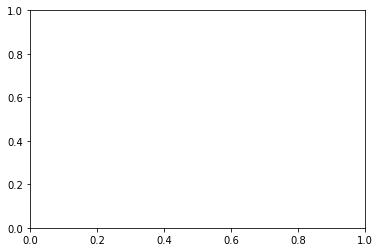

In [13]:
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y =  -1 / W[1, 0] * (W[0, 0] * plot_x + b[0])
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)

plot_y2 = -1 / W[1, 1] * (W[0, 1] * plot_x + b[1])
plot_y2 = np.reshape(plot_y2, [2, -1])
plot_y2 = np.squeeze(plot_y2)

#plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.scatter(x[:, 0], x[:, 1], c=y, s=100)
plt.plot(plot_x, plot_y, color='k', linewidth=2)   
plt.plot(plot_x, plot_y2, color='k', linewidth=2)   
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.text(0.425, 1.05, 'XOR', fontsize=14)
plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
plt.show()